In [26]:
# instalar libraries principais
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.compat._optional import import_optional_dependency

In [27]:
#versão pandas
print(pd.__version__)

1.3.1


In [28]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [29]:
# Carrega os dados
iris = pd.read_csv('iris.csv')

# Análise Descritiva

In [30]:
# verifica primeiras linhas
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
iris.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Species']

In [32]:
# Ve a estrutura dos dados
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Medidas de tendência central

In [33]:
# Média
print('Média :',iris['sepal length (cm)'].mean())

# Mediana
print('Mediana :',iris['sepal length (cm)'].median())

# Moda
print('Moda :',iris['sepal length (cm)'].mode())

Média : 5.843333333333335
Mediana : 5.8
Moda : 0    5.0
dtype: float64


## Medidas de variabilidade

In [34]:
# Variância
print('Variância :',iris['sepal length (cm)'].var())

# Desvio padrão
print('Desvio padrão :',iris['sepal length (cm)'].std())

Variância : 0.6856935123042505
Desvio padrão : 0.8280661279778629


## Medidas de relacionamento

In [35]:
# Covariância
iris.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [36]:
# Correlação
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Sumarização

In [37]:
# Sumariza
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# quantos registros existem de cada espécie?
iris['Species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Species, dtype: int64

# Análises Gráficas

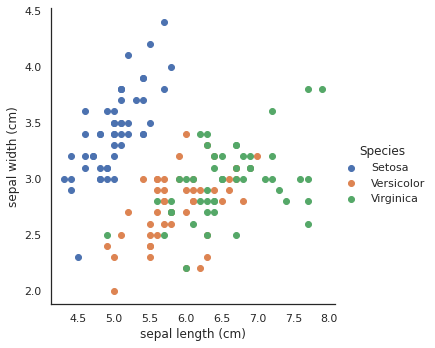

In [39]:
# gerar gráfico usando a espécie e cor
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

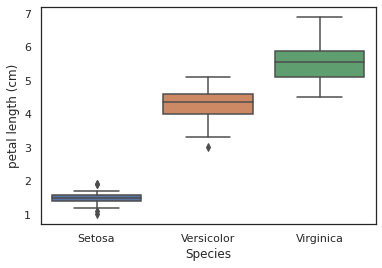

In [40]:
# gerar um gráfico do tipo boxplot as características individuais
sns.boxplot(x="Species", y="petal length (cm)", data=iris)

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[Species]'>]],
      dtype=object)

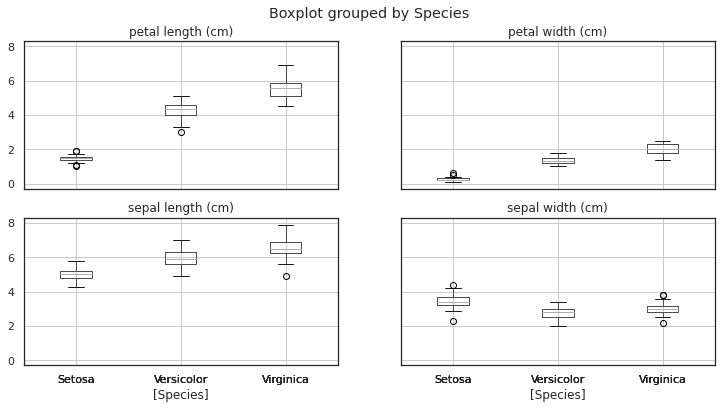

In [41]:
# gerar boxplot para cada uma das características por espécie
iris.boxplot(by="Species", figsize=(12, 6))

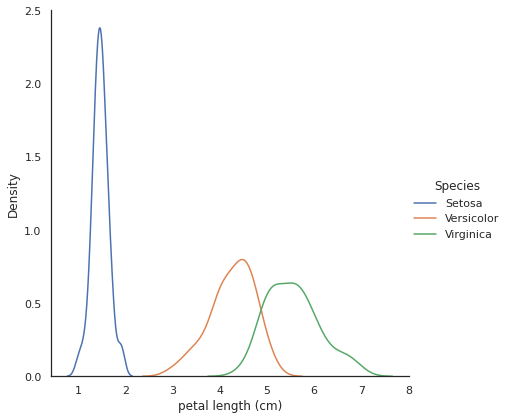

In [42]:
# gerar gráfico kde (densidade de kernel) sobre uma característica
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()

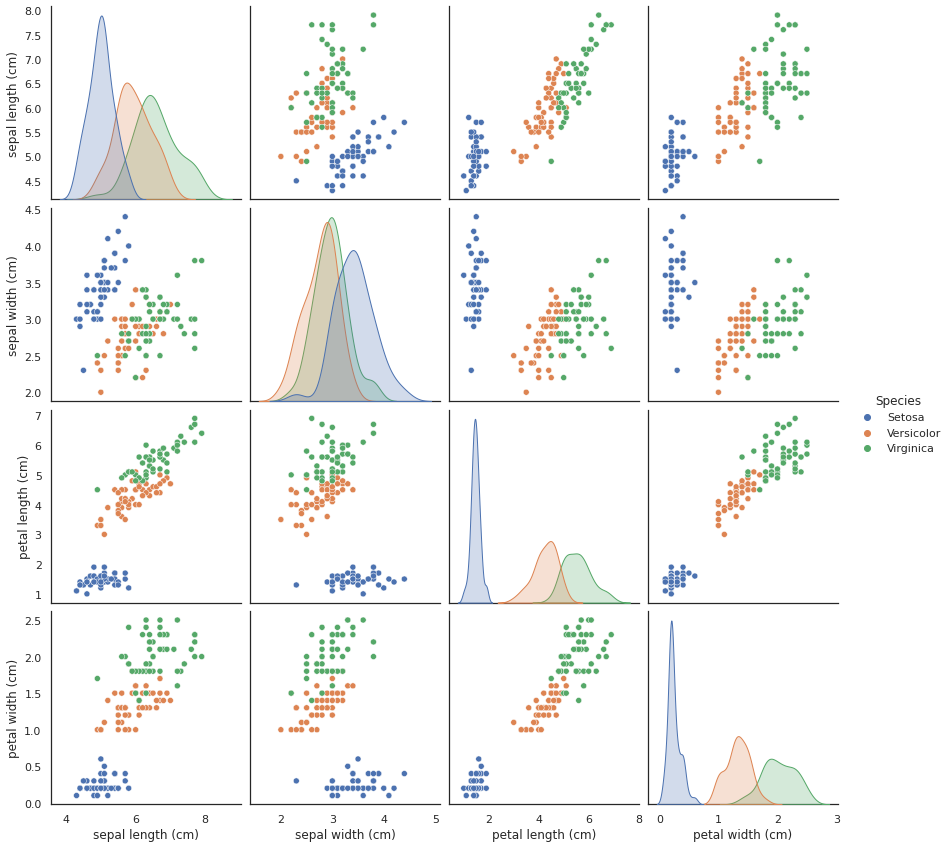

In [43]:
# gerar gráfico para analisar pares de características
sns.pairplot(iris, hue="Species", height=3)

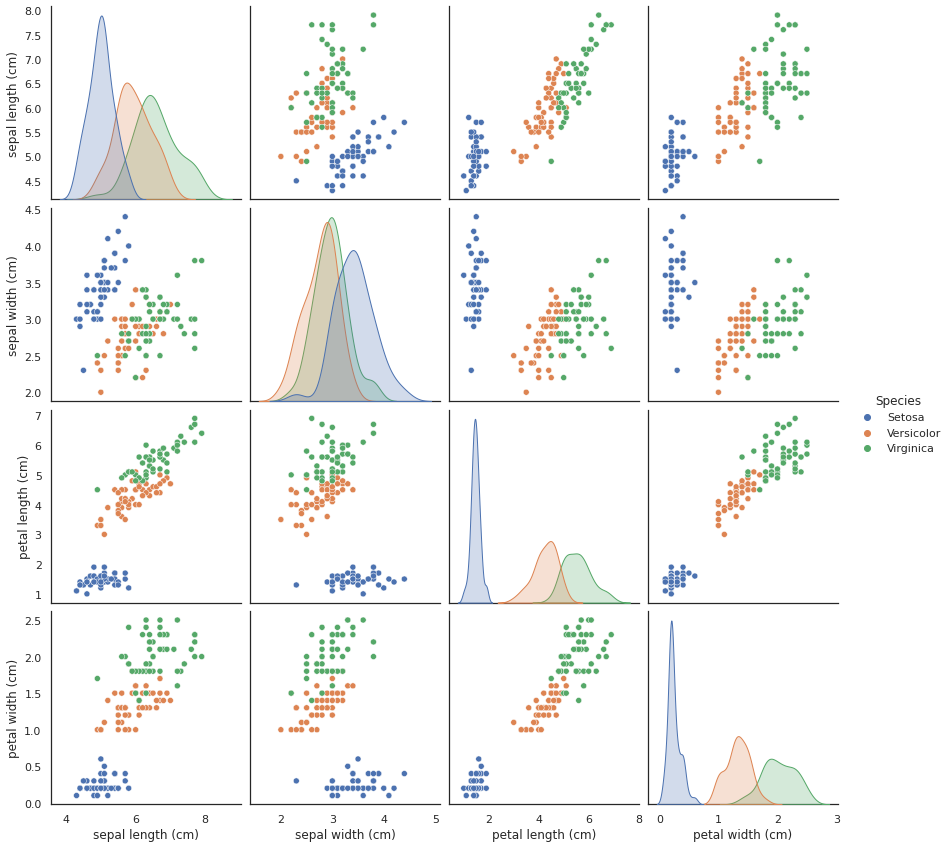

In [44]:
# gerar gráfico em pares com kde nas diagonais
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")

<AxesSubplot:>

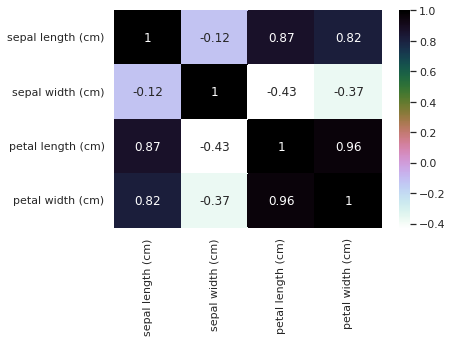

In [45]:
# gerar mapa de calor com a correlação das características
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')